In [112]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

In [28]:
shap.initjs()

In [2]:
data = pd.read_csv("selective_wesad.csv")

In [3]:
data.head()

MEAN_RR    MEDIAN_RR       SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0   860.758450   858.389130  75.161448  14.461513  14.460581    5.197343   
1  1044.449374  1036.796500  82.209648  22.516679  22.515843    3.651056   
2   510.072193   503.341590  32.094249   8.549018   8.547740    3.754145   
3   930.296969   940.394165  59.089578   7.816167   7.814190    7.559917   
4   692.067906   687.546285  47.584437   6.487698   6.487256    7.334564   

   MEAN_RR_MEAN_MEAN_REL_RR  pNN25  pNN50        SD1  ...  SDRR_RMSSD_REL_RR  \
0              -5208053.980   6.25   0.75  10.238012  ...           2.104142   
1               4953282.259  28.50   2.25  15.941094  ...           2.217618   
2              -1685541.831   3.50   0.00   6.051753  ...           1.254616   
3               5520501.969   0.00   0.00   5.532404  ...           1.998056   
4               6091202.713   0.00   0.00   4.592942  ...           2.869915   

   MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR  RMSSD_REL_RR          VLF  \
0    -0.000165      -0.000286     0.016772      0.007971  2013.584521   
1     0.000211      -0.000638     0.021200      0.009560  1926.201330   
2    -0.000303       0.000003     0.016013      0.012763   462.314125   
3     0.000169      -0.000397     0.008604      0.004306  1227.245560   
4     0.000114       0.001556     0.009200      0.003206  1306.992460   

            LF         HF  SSSQ class  SSSQ Label  
0   769.968054  19.157841         low           0  
1  1923.619778   2.263030         low           0  
2   354.014573  38.944294      medium           1  
3   165.025098   5.676306        high           2  
4   270.453366   4.455165        high           2  

[5 rows x 22 columns]

In [4]:
data.shape

(108520, 22)

In [5]:
data.isnull().sum()

MEAN_RR                     0
MEDIAN_RR                   0
SDRR                        0
RMSSD                       0
SDSD                        0
SDRR_RMSSD                  0
MEAN_RR_MEAN_MEAN_REL_RR    0
pNN25                       0
pNN50                       0
SD1                         0
SD2                         0
SDSD_REL_RR                 0
SDRR_RMSSD_REL_RR           0
MEAN_REL_RR                 0
MEDIAN_REL_RR               0
SDRR_REL_RR                 0
RMSSD_REL_RR                0
VLF                         0
LF                          0
HF                          0
SSSQ class                  0
SSSQ Label                  0
dtype: int64

In [6]:
X = data.drop("SSSQ Label", axis=1)
y = data["SSSQ Label"]

In [7]:
X.head()

MEAN_RR    MEDIAN_RR       SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0   860.758450   858.389130  75.161448  14.461513  14.460581    5.197343   
1  1044.449374  1036.796500  82.209648  22.516679  22.515843    3.651056   
2   510.072193   503.341590  32.094249   8.549018   8.547740    3.754145   
3   930.296969   940.394165  59.089578   7.816167   7.814190    7.559917   
4   692.067906   687.546285  47.584437   6.487698   6.487256    7.334564   

   MEAN_RR_MEAN_MEAN_REL_RR  pNN25  pNN50        SD1  ...  SDSD_REL_RR  \
0              -5208053.980   6.25   0.75  10.238012  ...     0.007971   
1               4953282.259  28.50   2.25  15.941094  ...     0.009559   
2              -1685541.831   3.50   0.00   6.051753  ...     0.012763   
3               5520501.969   0.00   0.00   5.532404  ...     0.004306   
4               6091202.713   0.00   0.00   4.592942  ...     0.003205   

   SDRR_RMSSD_REL_RR  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR  RMSSD_REL_RR  \
0           2.104142    -0.000165      -0.000286     0.016772      0.007971   
1           2.217618     0.000211      -0.000638     0.021200      0.009560   
2           1.254616    -0.000303       0.000003     0.016013      0.012763   
3           1.998056     0.000169      -0.000397     0.008604      0.004306   
4           2.869915     0.000114       0.001556     0.009200      0.003206   

           VLF           LF         HF  SSSQ class  
0  2013.584521   769.968054  19.157841         low  
1  1926.201330  1923.619778   2.263030         low  
2   462.314125   354.014573  38.944294      medium  
3  1227.245560   165.025098   5.676306        high  
4  1306.992460   270.453366   4.455165        high  

[5 rows x 21 columns]

In [8]:
X["SSSQ class"] = X["SSSQ class"].replace(["high", "medium", "low"], [2, 1, 0])

In [9]:
X.head()

MEAN_RR    MEDIAN_RR       SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0   860.758450   858.389130  75.161448  14.461513  14.460581    5.197343   
1  1044.449374  1036.796500  82.209648  22.516679  22.515843    3.651056   
2   510.072193   503.341590  32.094249   8.549018   8.547740    3.754145   
3   930.296969   940.394165  59.089578   7.816167   7.814190    7.559917   
4   692.067906   687.546285  47.584437   6.487698   6.487256    7.334564   

   MEAN_RR_MEAN_MEAN_REL_RR  pNN25  pNN50        SD1  ...  SDSD_REL_RR  \
0              -5208053.980   6.25   0.75  10.238012  ...     0.007971   
1               4953282.259  28.50   2.25  15.941094  ...     0.009559   
2              -1685541.831   3.50   0.00   6.051753  ...     0.012763   
3               5520501.969   0.00   0.00   5.532404  ...     0.004306   
4               6091202.713   0.00   0.00   4.592942  ...     0.003205   

   SDRR_RMSSD_REL_RR  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR  RMSSD_REL_RR  \
0           2.104142    -0.000165      -0.000286     0.016772      0.007971   
1           2.217618     0.000211      -0.000638     0.021200      0.009560   
2           1.254616    -0.000303       0.000003     0.016013      0.012763   
3           1.998056     0.000169      -0.000397     0.008604      0.004306   
4           2.869915     0.000114       0.001556     0.009200      0.003206   

           VLF           LF         HF  SSSQ class  
0  2013.584521   769.968054  19.157841           0  
1  1926.201330  1923.619778   2.263030           0  
2   462.314125   354.014573  38.944294           1  
3  1227.245560   165.025098   5.676306           2  
4  1306.992460   270.453366   4.455165           2  

[5 rows x 21 columns]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [11]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

def RFC(X_train, X_test, y_train, y_test, max_depth=10, random_state=18):

    print("Training Data")

    start_time = time.time()    
    rfc = RandomForestClassifier(max_depth=max_depth, random_state=random_state)
    rfc.fit(X_train, y_train)
    end_time = time.time()
    
    print("--------------- Model Trained ---------------")
    print("Time taken to train data", end_time-start_time)
    
    print("Checking Accuracy...")

    start_time = time.time()
    y_predicted = rfc.predict(X_test)
    end_time = time.time()

    print("Time taken to predict data", end_time-start_time)
        
    print("Random Forest Classifier gives Accuracy :", accuracy_score(y_test, y_predicted))
    return rfc

In [12]:
model = RFC(X_train, X_test, y_train, y_test)

Training Data
--------------- Model Trained ---------------
Time taken to train data 227.49453616142273
Checking Accuracy...
Time taken to predict data 0.3265702724456787
Random Forest Classifier gives Accuracy : 1.0


In [13]:
y_pred = model.predict(X_train)

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [26]:
explainer.expected_value

array([0.37486857, 0.37566278, 0.24946865])

In [20]:
len(shap_values)

3

In [32]:
shap_values[0].shape

(108520, 21)

# Force Plot

In [105]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X.iloc[0,:])

In [45]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:])

In [46]:
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], X.iloc[0,:])

# Summary Plot

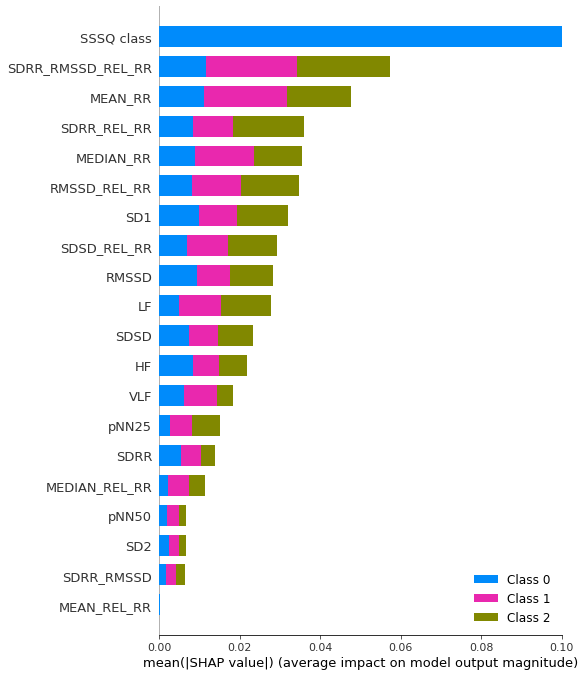

In [111]:
plt.clf()
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.xlim(0, 0.1)

# Dependence Plot

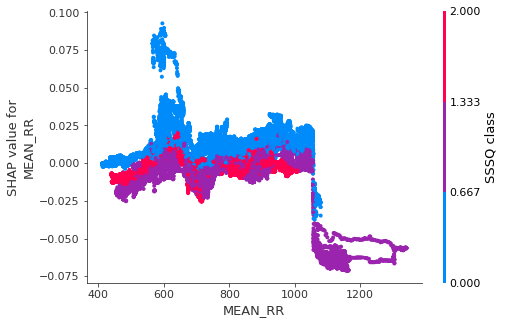

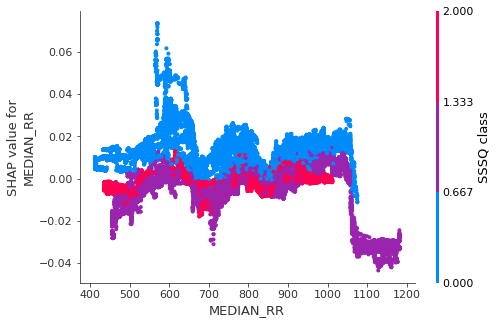

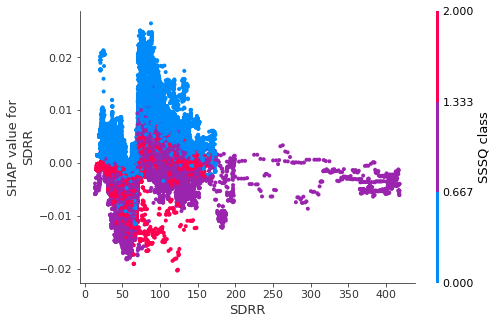

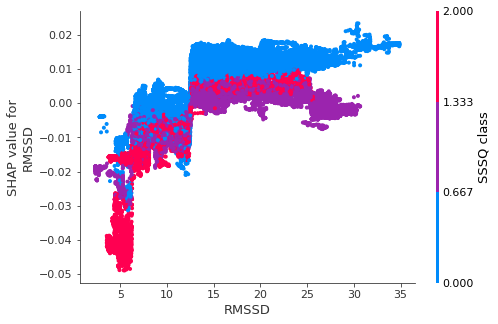

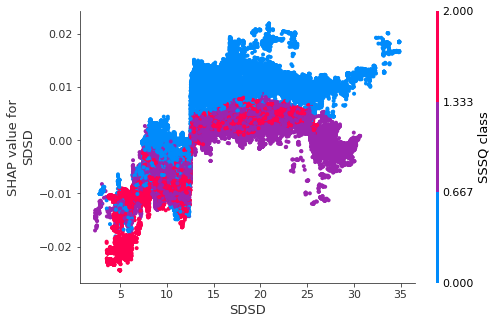

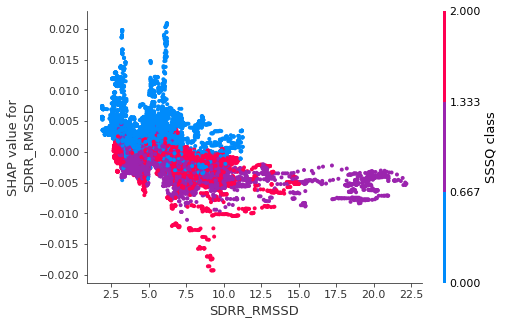

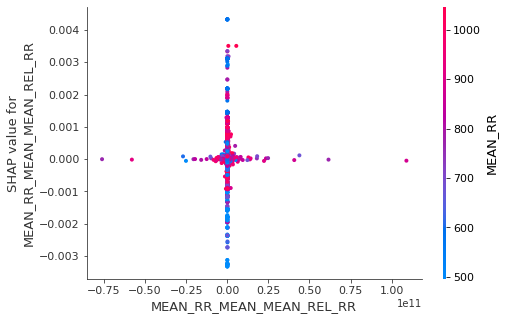

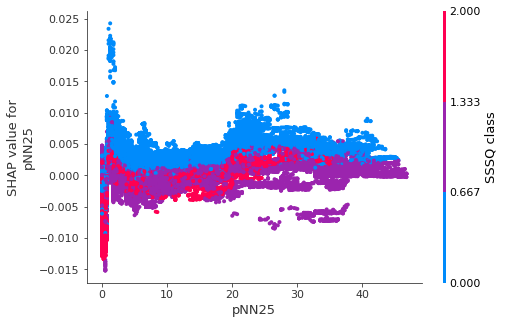

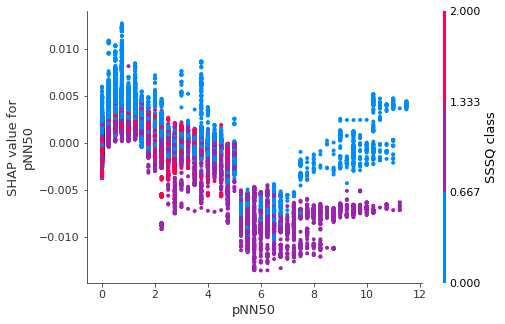

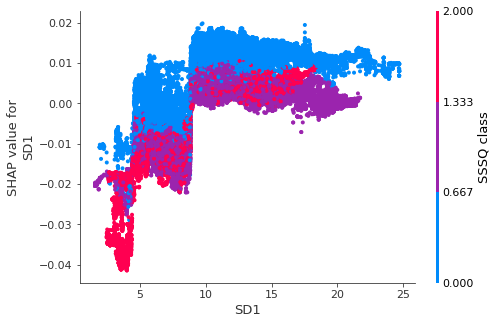

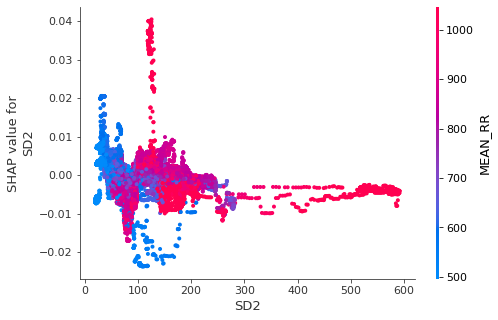

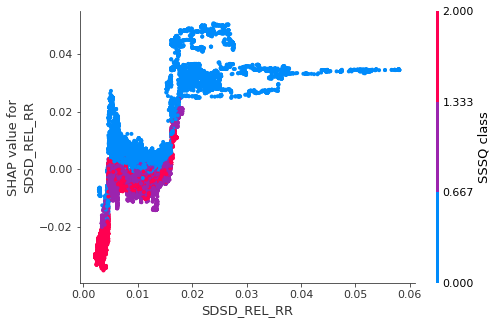

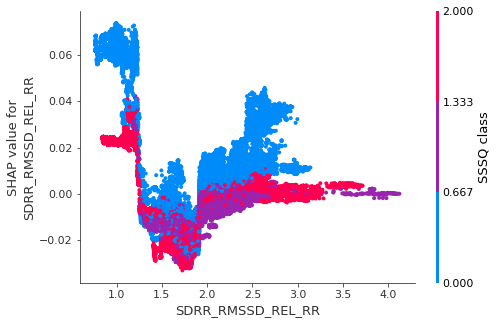

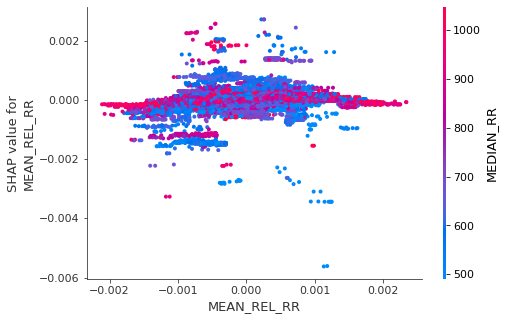

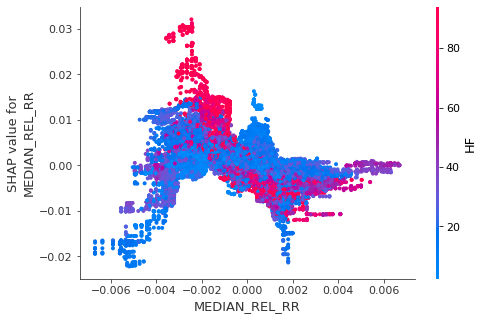

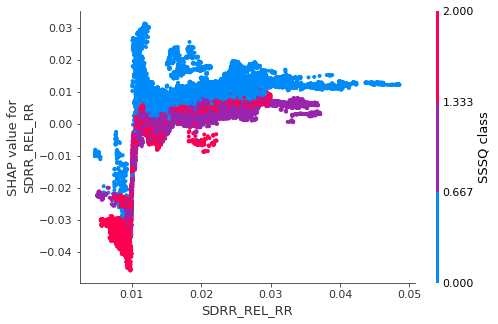

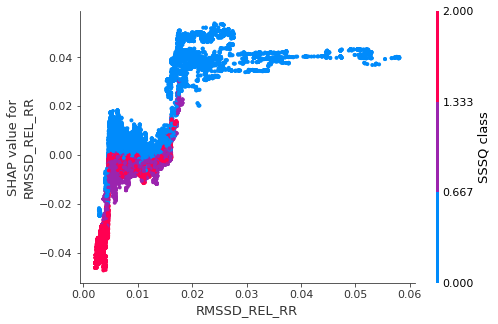

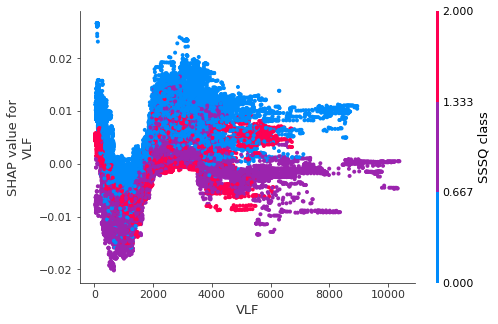

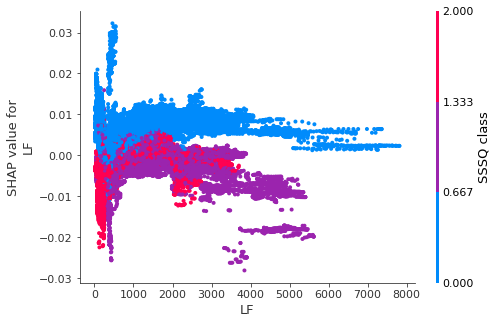

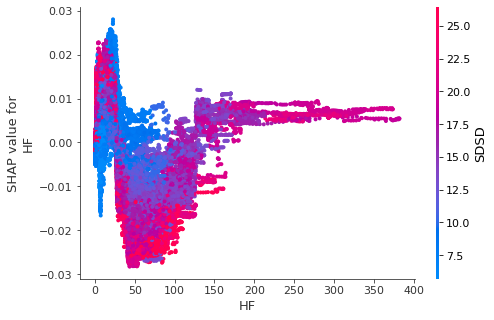

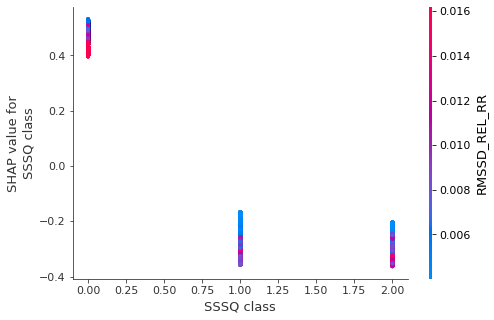

In [17]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[0], X, display_features=X)

# Decision plot

In [23]:
explainer.expected_value

array([0.37486857, 0.37566278, 0.24946865])

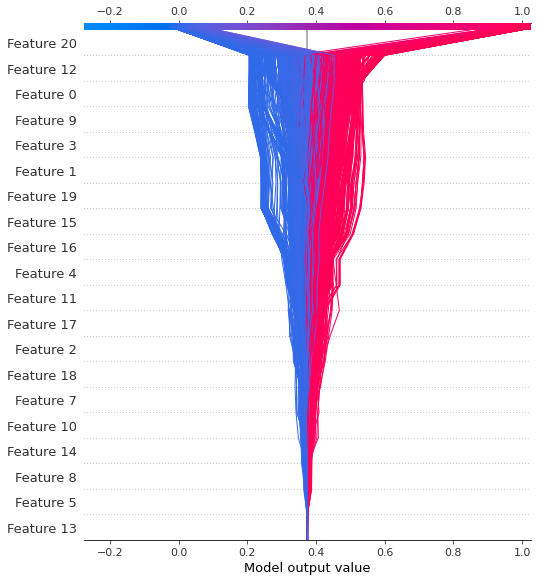

In [24]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][:1000,:])

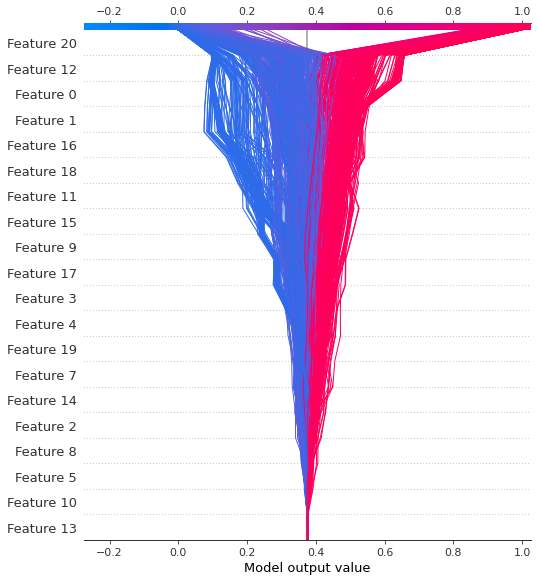

In [37]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][:1000,:])

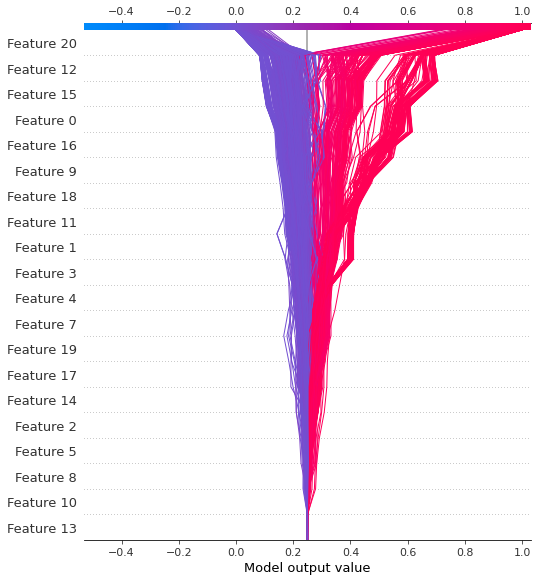

In [38]:
shap.decision_plot(explainer.expected_value[2], shap_values[2][:1000,:])